### **ResNet**

This notebook is for our residual network model. Sobel filter pre-processing function is applied to the images, *samplewise_center* and *samplewise_std_normalization* are both set to True.

Optimizer: ADAM

Batch size: 64

Image size: 64 x 64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import packages
import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Dropout
from keras.layers import add
from keras.preprocessing.image import ImageDataGenerator

# To retrieve files/pathnames matching a specified pattern
import glob

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

import random
SEED = 42
keras.utils.set_random_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/ASL_Dataset/Train'
TEST_DIR = '/content/drive/MyDrive/ASL_Dataset/Test'

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.4 MB/s 


In [ ]:
# Load all the images under each class (subdirectory)
def load_images(base_dir, directories_as_labels=True, files='**/*.jpg'):
  filenames = glob.glob(os.path.join(base_dir, files))

  # Load all the subdirectories as classes
  classes = (os.path.basename(os.path.dirname(name)) for name in filenames)
  df = pd.DataFrame(list(zip(filenames, classes)), columns=['path', 'label'])

  return df

train_df = load_images(TRAIN_DIR)
test_df = load_images(TEST_DIR)

In [ ]:
from skimage.filters import sobel, scharr
import cv2

def preprocess_image(image):
    '''Function that will be implied on each input. The function
    will run after the image is resized and augmented.
    The function should take one argument: one image (Numpy tensor
    with rank 3), and should output a Numpy tensor with the same
    shape.'''
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return sobely

In [ ]:
batch_size = 64
image_size = 64
num_class = len(train_df['label'].unique())

In [ ]:
# X_training data from a directory
# Sub-directory in that directory will be used as a class for each object
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   samplewise_center = True,
                                   samplewise_std_normalization = True,
                                   preprocessing_function = preprocess_image,
                                   horizontal_flip=False)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        directory=TRAIN_DIR,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset='training',
                        shuffle=True)

Found 116101 images belonging to 28 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
                        directory=TRAIN_DIR,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset='validation',
                        shuffle=True)

Found 49728 images belonging to 28 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

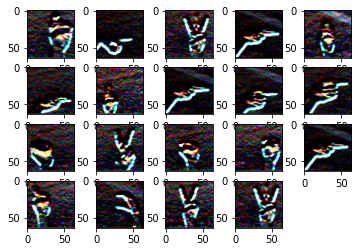

In [ ]:
x_batch, y_batch = train_generator.next()

fig=plt.figure()
columns = 5
rows = 4
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image = x_batch[num]
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

In [ ]:

input_shape = [image_size,image_size,3]
output_shape = 28

input = Input(shape=(input_shape[0], input_shape[1],input_shape[2]))

b1_conv2d_1 = Conv2D(64, kernel_size=4, strides=1, activation='relu', padding='same')(input)
b1_conv2d_2 = Conv2D(64, kernel_size=4, strides=2, activation='relu', padding='same')(b1_conv2d_1)
b1_dout_1 = Dropout(0.5)(b1_conv2d_2)

b2_conv2d_1 = Conv2D(64, kernel_size=4, strides=1, activation='relu', padding='same')(b1_dout_1)
b2_add_1 = add([b1_dout_1,b2_conv2d_1])
b2_conv2d_2 = Conv2D(128, kernel_size=4, strides=2, activation='relu', padding='same')(b2_add_1)
b2_dout_1 = Dropout(0.5)(b2_conv2d_2)

b3_conv2d_1 = Conv2D(128, kernel_size=4, strides=1, activation='relu', padding='same')(b2_dout_1)
b3_add_1 = add([b2_dout_1,b3_conv2d_1])
b3_conv2d_2 = Conv2D(256, kernel_size=4, strides=2, activation='relu', padding='same')(b3_add_1)
b3_dout_1 = Dropout(0.5)(b3_conv2d_2)

flatten = Flatten()(b3_dout_1)

b4_dense = Dense(512, activation='relu')(flatten)

output = Dense(28, activation = 'softmax')(b4_dense)

model = Model(input, output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   3136        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   65600       ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# Start the training process
history = model.fit(train_generator, validation_data= val_generator, epochs = 5)

Epoch 1/5
1815/1815 [==============================] - 31704s 17s/step - loss: 0.1603 - accuracy: 0.9535 - val_loss: 0.1567 - val_accuracy: 0.9657
Epoch 2/5
1815/1815 [==============================] - 933s 514ms/step - loss: 0.0315 - accuracy: 0.9919 - val_loss: 0.0744 - val_accuracy: 0.9850
Epoch 3/5
1815/1815 [==============================] - 927s 510ms/step - loss: 0.0344 - accuracy: 0.9922 - val_loss: 0.1089 - val_accuracy: 0.9785
Epoch 4/5
1815/1815 [==============================] - 946s 521ms/step - loss: 0.0421 - accuracy: 0.9930 - val_loss: 0.1334 - val_accuracy: 0.9842
Epoch 5/5
1815/1815 [==============================] - 977s 538ms/step - loss: 0.0442 - accuracy: 0.9941 - val_loss: 0.1726 - val_accuracy: 0.9872


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


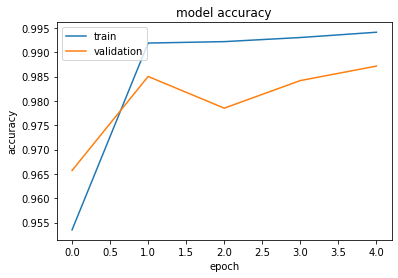

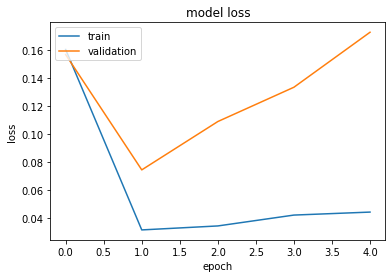

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/res-b2.h5')